## Look at the big picture
1. Aims: clustering



## Get the data

### Import the packages and the data

In [966]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/CustomerDataset.csv')

# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Take a Quick Look at the Data Structure

In [967]:
# get a glance of the data
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Female,29,499,85
1,2,Female,21,208,81
2,3,Female,27,300,48
3,4,Female,26,458,29
4,5,Male,57,221,4


In [968]:
# get the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [969]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

In [970]:
df.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,39.075000,393.630000,50.475000
std,57.879185,14.042626,170.715441,25.765065
min,1.000000,16.000000,93.000000,1.000000
25%,50.750000,29.000000,270.500000,32.750000
50%,100.500000,36.500000,399.500000,50.000000
75%,150.250000,49.000000,501.250000,72.250000
max,200.000000,74.000000,896.000000,99.000000


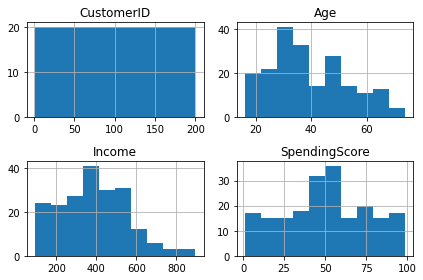

In [971]:
df.hist()
save_fig("hist")  

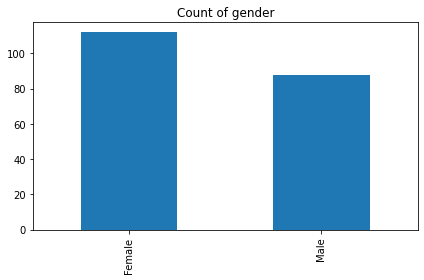

In [972]:
df["Gender"].value_counts().plot(kind='bar')
plt.title('Count of gender')
save_fig("Count of gender")  

## Prepare the data for ML algotithms


In [973]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

# for ploting
data_for_plot = df.values

X =  df.drop(['CustomerID','Gender'], axis=1)



### Determine the cluster numbers

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

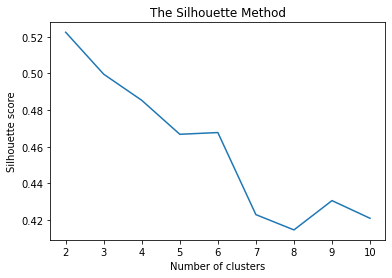

<Figure size 432x288 with 0 Axes>

In [974]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
save_fig("silhouette_method_plot")

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

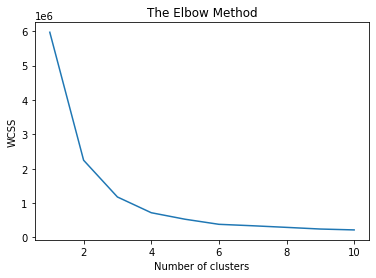

<Figure size 432x288 with 0 Axes>

In [975]:
# using elbow method to find the optimal number of clusters
wcss_with = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_with.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_with)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
save_fig("elbow_method_plot")


## Use kmeans to do clustering

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


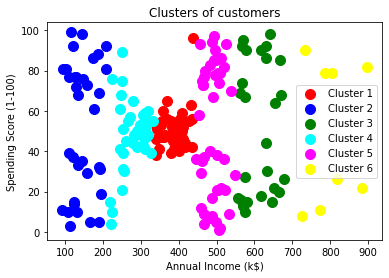

<Figure size 432x288 with 0 Axes>

In [976]:
# visualising the clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(data_for_plot[y_kmeans == 0, 3], data_for_plot[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_for_plot[y_kmeans == 1, 3], data_for_plot[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_for_plot[y_kmeans == 2, 3], data_for_plot[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_for_plot[y_kmeans == 3, 3], data_for_plot[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_for_plot[y_kmeans == 4, 3], data_for_plot[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data_for_plot[y_kmeans == 5, 3], data_for_plot[y_kmeans == 5, 4], s = 100, c = 'yellow', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
save_fig("kmeans_plot")